In [11]:
import pandas as pd
def 找遍所有文件里某类型文件的路径(path,x=5,s='.xlsx'):
    '''   输入:#找遍path文件夹里所有尾部最后x=3位为s='.py'的文件
          输出:list类型所有文件路径的列表'''

    import os
    所找文件路径 = []
    #在walk的第二层里,排除venv文件夹
    for 二层 in os.walk(path):
        if 'venv' in 二层[0]:
            pass
        else:
            #在第二层的下一层第三个包里,找最后3个字符等于.py的.
            for 四层 in 二层[2]:
                if 四层[-(x):]==s :
                    所找文件路径.append((二层[0]+'/'+四层,四层))
    return 所找文件路径


sh_list=找遍所有文件里某类型文件的路径('C:/Users/YcAllenEffy/Desktop/andyou全销量')

# 初始化
df0=pd.read_excel('C:/Users/YcAllenEffy/Desktop/andyou2018销量/201804.xlsx').head(0)
df0['时间']='201803'

for i in sh_list:
    df1=pd.read_excel(i[0])
    df1['时间']=i[1][:6]
    df0=pd.concat([df0,df1])

# 时间格式化
df0['时间']=pd.to_datetime(df0['时间']+'01')
df0=df0.set_index('时间')

df0

,菜品名称,菜品分类,售卖价,销量,销售金额,优惠金额,应收金额,点单率
时间,,,,,,,,
2018-04-01,优格可可卷（份）,蛋卷,35.0,13,455,90.76,364.24,26.00%
2018-04-01,阿加莎（份）,冰饮,35.0,8,280,69.45,210.55,16.00%
2018-04-01,Latte（份）,咖啡（H）,28.0,6,168,73.23,94.77,10.00%
2018-04-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,6,210,83.58,126.42,12.00%
2018-04-01,海盐焦糖杏仁卷（1份）,蛋卷,28.0,6,168,75.54,92.46,10.00%
...,...,...,...,...,...,...,...,...
2020-12-01,海盐焦糖杏仁整卷（份）,整卷,175.0,1,175,0.00,175.00,0.16%
2020-12-01,玛德琳（份）,小甜点,10.0,1,10,0.00,10.00,0.16%
2020-12-01,苏打（份）,冰饮,20.0,1,20,0.00,20.00,0.16%


In [2]:
# 根据时间选取数据
df0_1=df0.loc['2020-01':'2020-12']

In [6]:
# 按菜品统计整表
gb=df0.groupby('菜品名称').aggregate({'售卖价':'mean','销量':'mean','菜品分类':'count'})
gb=gb.sort_values('销量',ascending=False)#按照销量排序
gb.round(1)#保留一位小数


,售卖价,销量,菜品分类
菜品名称,,,
海盐焦糖杏仁卷（1份）,35.0,214.6,12
优格可可卷（份）,35.0,123.6,12
红丝绒树莓卷（份）,38.0,70.0,2
白桃乌龙茶（份）,28.0,68.3,12
抹茶草莓卷（份）,38.0,66.0,1
...,...,...,...
酒渍葡萄费南雪（份）,12.0,1.0,1
磅蛋糕（两件套餐）,20.0,1.0,1
车厘子蛋糕（6寸）,188.0,1.0,1


In [30]:
# 按菜品名称 统计整表
gb1=df0_1.groupby('菜品名称').aggregate({'售卖价':'mean','销量':'mean','菜品分类':'count'})
gb1=gb1.sort_values('销量',ascending=False)#按照销量排序
gb1.round(1)#保留一位小数

,售卖价,销量,菜品分类
菜品名称,,,
海盐焦糖杏仁卷（1份）,35,180.7,3
优格可可卷（份）,35,86.3,3
冰芭乐白桃乌龙茶（份）,35,58.7,3
粉红玫瑰苏打（份）,35,58.3,3
大可露丽（原味（份）,16,56.3,3
...,...,...,...
小果酱（份）,39,1.0,1
蓝莓酱,0,1.0,1
优格可可整卷（份）,175,1.0,1


In [3]:
# 按照菜品分类 分类统计
gb=df0_1.groupby('菜品分类').aggregate({'应收金额':'sum','点单率':'count'})
gb=gb.sort_values('应收金额',ascending=False)#按照销量排序
gb

,应收金额,点单率
菜品分类,,
蛋卷,128588.81,76
冰饮,94911.10,163
咖啡,74293.37,203
松饼,41479.06,51
蛋糕,20459.93,30
花茶,19243.18,48
小甜点,12624.40,66
热饮,12114.15,77
handmade,1881.00,24


In [20]:
# 按照年份分类
gb=df0.groupby('时间').aggregate({'应收金额':'sum'})
# gb=gb.sort_values('应收金额',ascending=False)#按照销量排序
gb

,应收金额
时间,
2019-01-01,54540.0
2019-02-01,33369.0
2019-03-01,65509.0
2019-04-01,54850.0
2019-05-01,53076.0
2019-06-01,40722.0
2019-07-01,33851.0
2019-08-01,48995.0
2019-09-01,44720.0


In [20]:
# 单一产品设置
df0=df0[df0['菜品名称']=='海盐焦糖杏仁卷（1份）']
df0

,菜品名称,菜品分类,售卖价,销量,销售金额,优惠金额,应收金额,点单率,年份,年份s
时间,,,,,,,,,,
2018-04-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,6,210,83.58,126.42,12.00%,2018-04-01,2018-04
2018-04-01,海盐焦糖杏仁卷（1份）,蛋卷,28.0,6,168,75.54,92.46,10.00%,2018-04-01,2018-04
2018-05-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,224,7840,624.58,7215.42,31.01%,2018-05-01,2018-05
2018-06-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,165,5775,59.49,5715.51,33.40%,2018-06-01,2018-06
2018-07-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,182,6370,101.01,6268.99,33.66%,2018-07-01,2018-07
2018-08-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,192,6720,47.05,6672.95,31.49%,2018-08-01,2018-08
2018-09-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,149,5215,7.00,5208.00,31.12%,2018-09-01,2018-09
2018-10-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,221,7735,79.11,7655.89,32.58%,2018-10-01,2018-10
2018-11-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,211,7385,12.90,7372.10,31.17%,2018-11-01,2018-11


In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

<ipython-input-25-1a5d0150672e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['年份']=df0.index
<ipython-input-25-1a5d0150672e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['年份s']=df0['年份'].apply(str).str[:7]


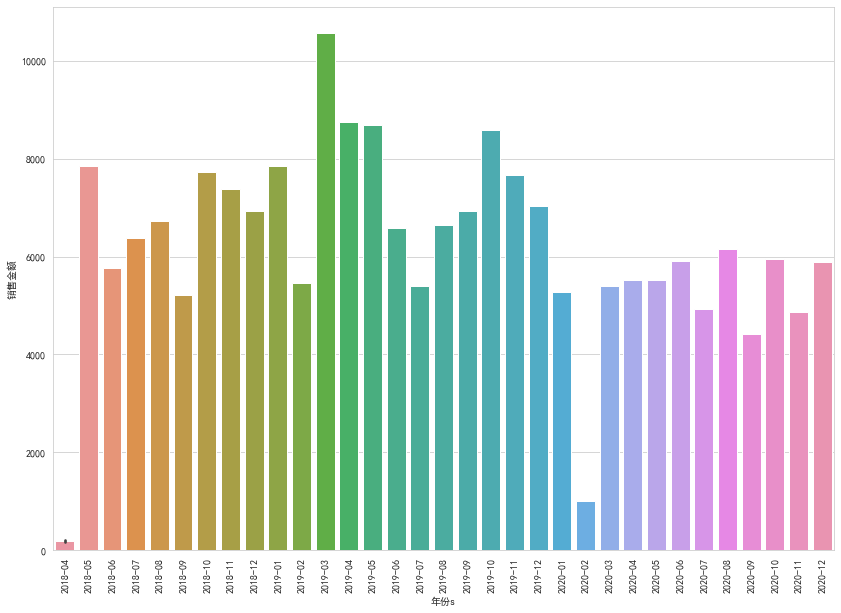

In [25]:
# 优化x轴时间格式
df0['年份']=df0.index
df0['年份s']=df0['年份'].apply(str).str[:7]


f, ax= plt.subplots(figsize = (14, 10))
sns.set_style('darkgrid',{'font.sans-serif':['simhei','Arial']})#初始化表格风格,字体设置
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)#设置x轴文字竖排
sns.barplot(x='年份s',y='销售金额',data=df0)

In [19]:
df0

,菜品名称,菜品分类,售卖价,销量,销售金额,优惠金额,应收金额,点单率,年份,年份s
时间,,,,,,,,,,
2018-04-01,优格可可卷（份）,蛋卷,35.0,13,455,90.76,364.24,26.00%,2018-04-01,2018-04
2018-04-01,阿加莎（份）,冰饮,35.0,8,280,69.45,210.55,16.00%,2018-04-01,2018-04
2018-04-01,Latte（份）,咖啡（H）,28.0,6,168,73.23,94.77,10.00%,2018-04-01,2018-04
2018-04-01,海盐焦糖杏仁卷（1份）,蛋卷,35.0,6,210,83.58,126.42,12.00%,2018-04-01,2018-04
2018-04-01,海盐焦糖杏仁卷（1份）,蛋卷,28.0,6,168,75.54,92.46,10.00%,2018-04-01,2018-04
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,海盐焦糖杏仁整卷（份）,整卷,175.0,1,175,0.00,175.00,0.16%,2020-12-01,2020-12
2020-12-01,玛德琳（份）,小甜点,10.0,1,10,0.00,10.00,0.16%,2020-12-01,2020-12
2020-12-01,苏打（份）,冰饮,20.0,1,20,0.00,20.00,0.16%,2020-12-01,2020-12
